In [72]:
%matplotlib inline
from sklearn import linear_model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

The following will read the Application Server data and put in a Pandas dataframe.
Afterwards the data desciption file is opened and printed to the screen. This file is quite basic. A more detailed one can be found here: https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.names.

In [82]:
app_df = pd.read_csv("../app_server.csv")

In [84]:
f = open('../APP_README', 'r')
file_content = f.read()
print(file_content)
f.close()

DT    = Datetime
VPH   = Vistis per Hour
TPH   = Transactions per Hour
CPU   = CPU_Usage in %
MEM   = MEM_Usage in %
IO    = I/O in %

Number of Instances = 8760
Number of Features  = 6



In [55]:
print(app_df.head(5))

              DT    VPH    TPH   CPU   MEM    IO
0  1/1/2014 0:00  49299  17579  18.1  46.6  12.9
1  1/1/2014 1:00  28372   9092  16.6  37.9  14.1
2  1/1/2014 2:00   6528   2051  11.5  40.1  11.4
3  1/1/2014 3:00   1291    463  13.7  45.6  11.9
4  1/1/2014 4:00   4709   1588  18.8  45.0  15.1


datetime64[ns]


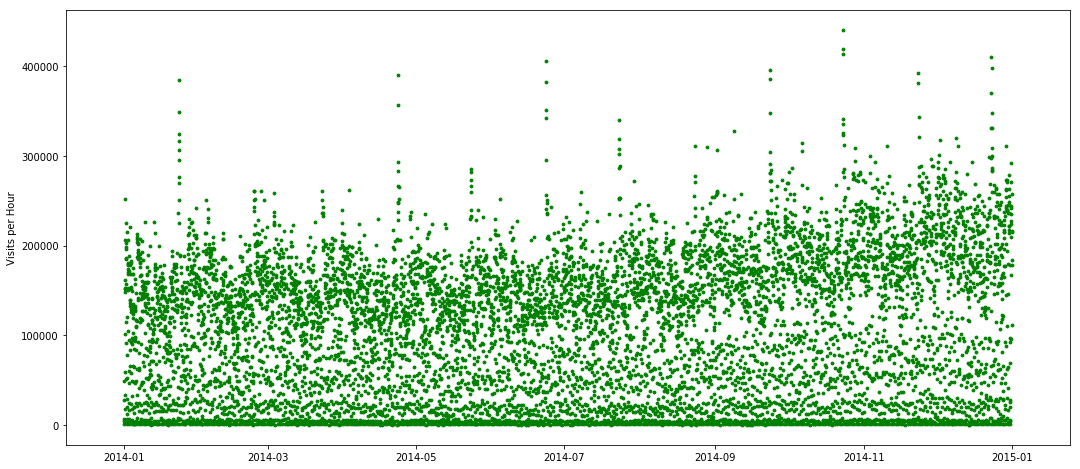

In [190]:
app_df['DT'] = pd.to_datetime(app_df['DT'], format="%m/%d/%Y %H:%M")
datetime = app_df['DT']
datetime = datetime.values.reshape(len(datetime), 1)
print(datetime.dtype)
vph = app_df['VPH']
vph = vph = vph.values.reshape(len(vph), 1)
plt.rcParams['figure.figsize'] = [18, 8]
plt.ylabel('Visits per Hour')
plt.scatter(datetime, visits_per_hour, s=8, color='g')

In [150]:
X_app = app_df['CPU']
X_app = X_app.values.reshape(len(X_app), 1)
Y_app = app_df['VPH']
Y_app = Y_app.values.reshape(len(Y_app), 1)
X_app_train  = X_app[:-4380]
X_app_test = X_app[-4380:]
Y_app_train = Y_app[:-4380]
Y_app_test = Y_app[-4380:]

In [151]:
regr = linear_model.LinearRegression()

In [152]:
regr.fit(X_app_train, Y_app_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

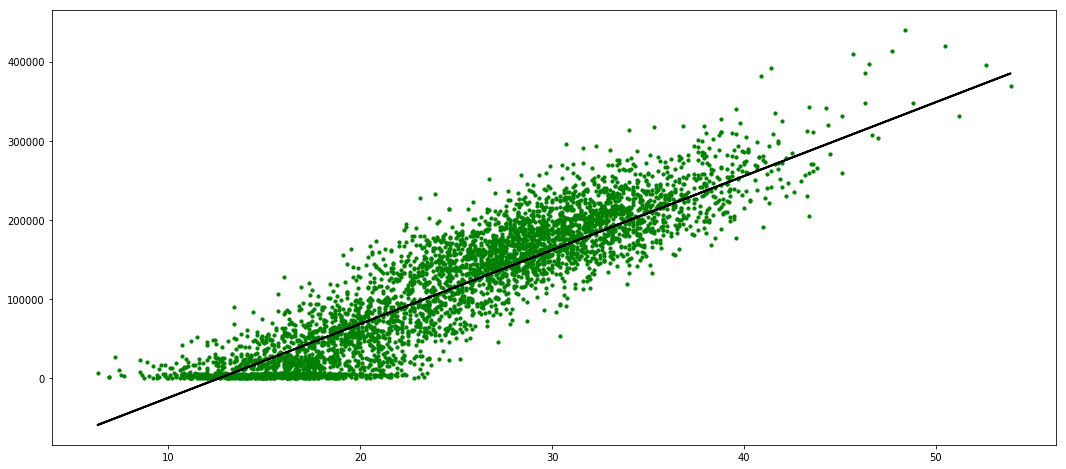

In [193]:
plt.scatter(X_app_test, Y_app_test, color='g', s = 10)
plt.plot(X_app_test, regr.predict(X_app_test), color='black', linewidth=2)